In [55]:
import pandas as pd
import numpy as np
import random
import scipy.stats
import math
import seaborn as sns
from matplotlib import pyplot as plt
from random import sample
from scipy.stats import chisquare
from scipy.stats import geom
from scipy.stats import t
from scipy import stats
z90 = 1.645
z95 = 1.96
z99 = 2.576
%matplotlib inline

CHAPTER 7.1: One sample means with the t-distribution

In [43]:
# calculate two tailed p-value
(1 - t.cdf(x=2.14, df=20)) * 2

0.044865550825499589

(array([    3.,    26.,   117.,   442.,  1386.,  2496.,  2755.,  1786.,
          717.,   196.,    54.,    14.,     8.]),
 array([-4.65714016, -3.90690356, -3.15666697, -2.40643038, -1.65619379,
        -0.9059572 , -0.1557206 ,  0.59451599,  1.34475258,  2.09498917,
         2.84522576,  3.59546236,  4.34569895,  5.09593554]),
 <a list of 13 Patch objects>)

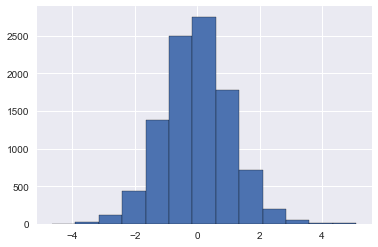

In [56]:
#generate t distribution with sample size 10000
df = 12
x = t.rvs(df=df, size=10000)

#create plot of t distribution
plt.hist(x, edgecolor='black', bins=df+1)

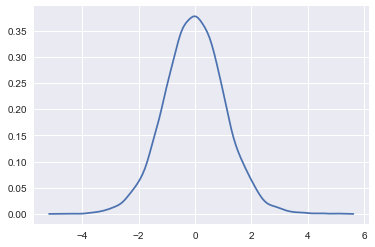

In [57]:
sns.kdeplot(x)
plt.show()

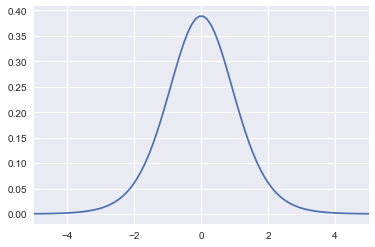

In [70]:
rv = t(df=10, loc=0, scale=1)
x = np.linspace(rv.ppf(0.0001), rv.ppf(0.9999), 100)
y = rv.pdf(x) 

plt.xlim(-5,5)
plt.plot(x,y)

In [71]:
rv.ppf(0.0001)

-5.693820101511748